## Estrategia de Backtesting

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Descargamos los datos de NVIDIA para el último año
df = yf.download("NVDA", period="1y")

# Filtramos las columnas necesarias para el modelo
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]  # Aplana MultiIndex
df = df[['Open', 'High', 'Low', 'Close']].copy()

# Calculamos la media móvil de 10 días
df['SMA_10'] = df['Close'].rolling(window=10).mean()

df


C:\Users\operez\AppData\Local\Temp\ipykernel_33284\4187549634.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("NVDA", period="1y")
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,SMA_10
Date,,,,,
2024-08-01,117.492887,120.122061,106.776271,109.175514,NaN
2024-08-02,103.727229,108.685661,101.337984,107.236115,NaN
2024-08-05,92.030924,103.377346,90.661362,100.418274,NaN
2024-08-06,103.807197,107.675978,100.518243,104.217072,NaN
2024-08-07,107.775952,108.765645,98.658837,98.878769,NaN
...,...,...,...,...,...
2025-07-25,173.610001,174.720001,172.960007,173.500000,170.798001
2025-07-28,174.020004,177.000000,173.970001,176.750000,172.066000
2025-07-29,177.960007,179.380005,175.020004,175.509995,172.547000


In [17]:
print(df.columns)
print(df.head(12))


Index(['Open', 'High', 'Low', 'Close', 'SMA_10'], dtype='object')
                  Open        High         Low       Close      SMA_10
Date                                                                  
2024-08-01  117.492887  120.122061  106.776271  109.175514         NaN
2024-08-02  103.727229  108.685661  101.337984  107.236115         NaN
2024-08-05   92.030924  103.377346   90.661362  100.418274         NaN
2024-08-06  103.807197  107.675978  100.518243  104.217072         NaN
2024-08-07  107.775952  108.765645   98.658837   98.878769         NaN
2024-08-08  101.967788  105.466683   97.489200  104.936852         NaN
2024-08-09  105.606637  106.566333  103.397336  104.716919         NaN
2024-08-12  106.286428  111.034929  106.226450  108.985573         NaN
2024-08-13  112.404489  116.193293  111.544760  116.103317         NaN
2024-08-14  118.492564  118.562542  114.033974  118.042709  107.271111
2024-08-15  118.722501  123.201082  117.432908  122.821205  108.635680
2024-08-16 

In [18]:
# Paso 3: Eliminar filas con NaN en SMA_10
df.dropna(subset=['SMA_10'], inplace=True)

# Creamos una nueva columna para las señales
df['Signal'] = 0

# Señal de compra: el precio cierra por debajo de la SMA de 10 días
df.loc[df['Close'] < df['SMA_10'], 'Signal'] = 1  # Comprar

# Señal de venta: el precio cierra por encima de la SMA de 10 días
df.loc[df['Close'] > df['SMA_10'], 'Signal'] = -1  # Vender



In [19]:
# Creamos una columna de "posición": 1 si estamos dentro, 0 si no
df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')

# Calculamos los retornos diarios
df['Returns'] = df['Close'].pct_change()

# Retornos de la estrategia (cuando estamos dentro del mercado)
df['Strategy_Returns'] = df['Returns'] * df['Position']


C:\Users\operez\AppData\Local\Temp\ipykernel_33284\1343516601.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')


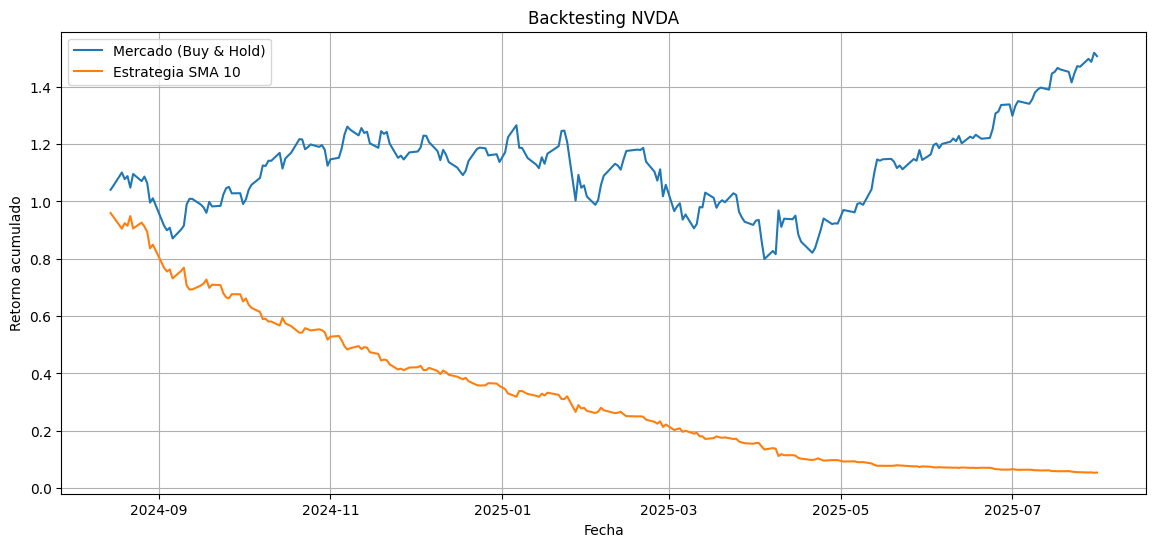

In [20]:
# Acumulamos los retornos
df['Cumulative_Market'] = (1 + df['Returns']).cumprod()
df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()

# Graficamos
plt.figure(figsize=(14,6))
plt.plot(df['Cumulative_Market'], label='Mercado (Buy & Hold)')
plt.plot(df['Cumulative_Strategy'], label='Estrategia SMA 10')
plt.title('Backtesting NVDA')
plt.xlabel('Fecha')
plt.ylabel('Retorno acumulado')
plt.legend()
plt.grid(True)
plt.show()
